<a href="https://www.kaggle.com/code/olorunsogoabiodun/children-anemic-condition?scriptVersionId=166829406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# read data
data = pd.read_csv('/kaggle/input/factors-affecting-children-anemia-level/children anemia.csv')

In [4]:
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [5]:
age_group = data.iloc[:,0].apply(lambda x: int(str(x).split('-')[1]) - int(str(x).split('-')[0]))

In [6]:
# display number of uique elements in the numeric columns in the dataframe
data.select_dtypes(exclude='number').nunique()

Age in 5-year groups                                                  7
Type of place of residence                                            2
Highest educational level                                             4
Wealth index combined                                                 5
Anemia level                                                          4
Have mosquito bed net for sleeping (from household questionnaire)     2
Smokes cigarettes                                                     2
Current marital status                                                6
Currently residing with husband/partner                               2
When child put to breast                                             41
Had fever in last two weeks                                           3
Anemia level.1                                                        4
Taking iron pills, sprinkles or syrup                                 3
dtype: int64

In [7]:
# drop duplicate rows
data_non = data.dropna(subset=['Anemia level']).drop_duplicates()

In [8]:
# fill all null values in the numerical data type category
data_non[data_non.select_dtypes('number').columns] = data_non.select_dtypes('number').apply(lambda x: x.fillna(round(np.mean(x),1)), axis=0)

In [9]:
data_non.isnull().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)       0
Anemia level                                                                0
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   719
When child put to breast                                        

In [10]:
# data_non = data.dropna()

In [11]:
# forward and backward fill of other null values
data_non = data_non.ffill(limit=3).bfill(limit=3)

In [12]:
# check if any value is missing
data_non.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two wee

In [13]:
# count values of all columns in the dataframe
print('Number of unique values in each column:\n')
for col in data_non.columns:
    print(f'{col} = {data_non[col].nunique():<10}')

Number of unique values in each column:

Age in 5-year groups = 7         
Type of place of residence = 2         
Highest educational level = 4         
Wealth index combined = 5         
Births in last five years = 5         
Age of respondent at 1st birth = 33        
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal) = 123       
Anemia level = 4         
Have mosquito bed net for sleeping (from household questionnaire) = 2         
Smokes cigarettes = 2         
Current marital status = 6         
Currently residing with husband/partner = 2         
When child put to breast = 38        
Had fever in last two weeks = 3         
Hemoglobin level adjusted for altitude (g/dl - 1 decimal) = 120       
Anemia level.1 = 4         
Taking iron pills, sprinkles or syrup = 3         


In [14]:
# drop column 'When child put to breast' because it is not labelled properly
data_non.drop(['When child put to breast','Anemia level.1'],axis= 1,inplace=True)

In [15]:
# rename and get the average of the age groups
data_non['Age in 5-year groups'] = data_non["Age in 5-year groups"].apply(lambda x:sum(map(int,x.split('-')))/2)
data_non.rename(columns= {'Age in 5-year groups':'Age average'}, inplace = True)

In [16]:
data_non.tail()

,Age average,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
33918,37.0,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,No,108.0,Yes
33919,37.0,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,No,120.0,Yes
33920,27.0,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,Living with her,No,120.0,No
33921,27.0,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,No,119.0,No
33922,22.0,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,No,75.0,Yes


In [17]:
data_non['Type of place of residence'].replace({'Urban':1,'Rural':0})

3        1
5        1
6        1
7        1
9        1
        ..
33918    0
33919    0
33920    0
33921    0
33922    0
Name: Type of place of residence, Length: 13012, dtype: int64

In [18]:
diff_age = np.abs(np.where(data_non['Age average'] - data_non['Age of respondent at 1st birth']==0, 1,(data_non['Age average'] - data_non['Age of respondent at 1st birth'])))
yr_birth_avg = data_non['Births in last five years'] / diff_age
wealth_avg_birth = pd.concat([data_non['Wealth index combined'],yr_birth_avg],axis = 1)

In [19]:
wealth_avg_birth.groupby('Wealth index combined').mean()

,Births in last five years
Wealth index combined,
Middle,0.321718
Poorer,0.292351
Poorest,0.275134
Richer,0.354809
Richest,0.400991


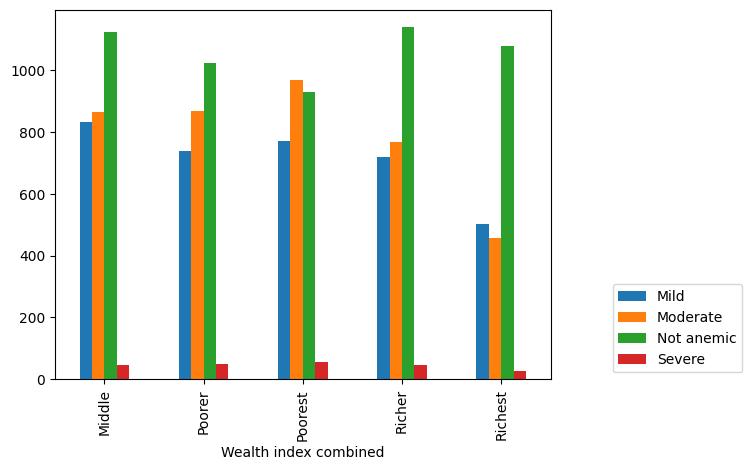

In [20]:
wealth_n_condition = data_non[['Wealth index combined','Anemia level']]
ax = wealth_n_condition.groupby(['Wealth index combined','Anemia level']).size().unstack().plot(kind='bar',)
ax.legend(loc=4, bbox_to_anchor=(1.4,.0))

In [21]:
wealth_groups = wealth_avg_birth.groupby('Wealth index combined')

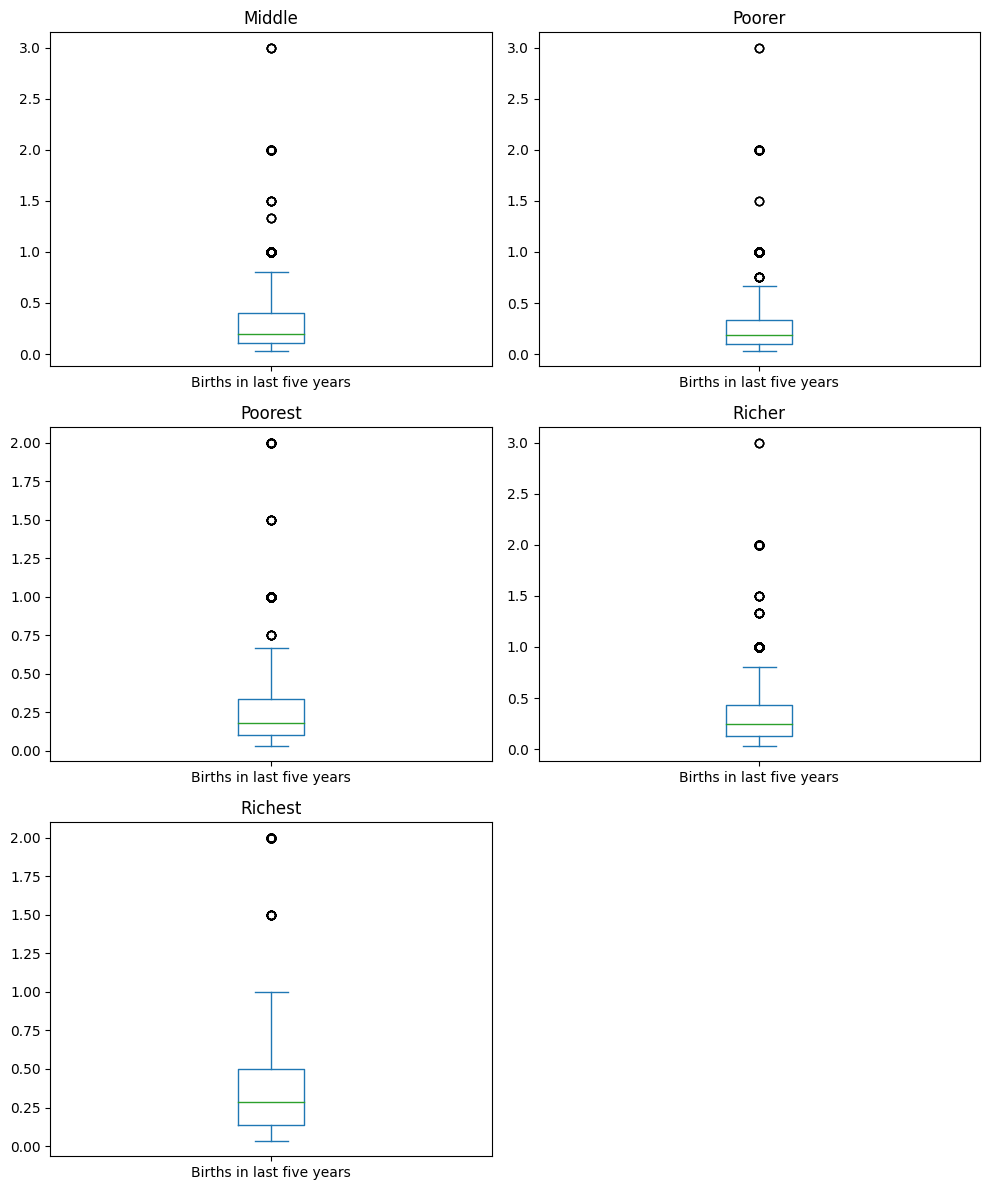

In [22]:
fig, axes = plt.subplots(3,2,figsize=(10,12))
fig.set_alpha(0.5)
axes = axes.flatten()
for index,key in enumerate(list(wealth_groups.groups.keys())):
    wealth_groups.get_group(key).plot(kind='box',ax=axes[index],label = key)
    axes[index].set_title(key)
axes[-1].axis('off')
plt.tight_layout()

In [23]:
# reset dataframe index
data_non.reset_index(drop = True, inplace= True)

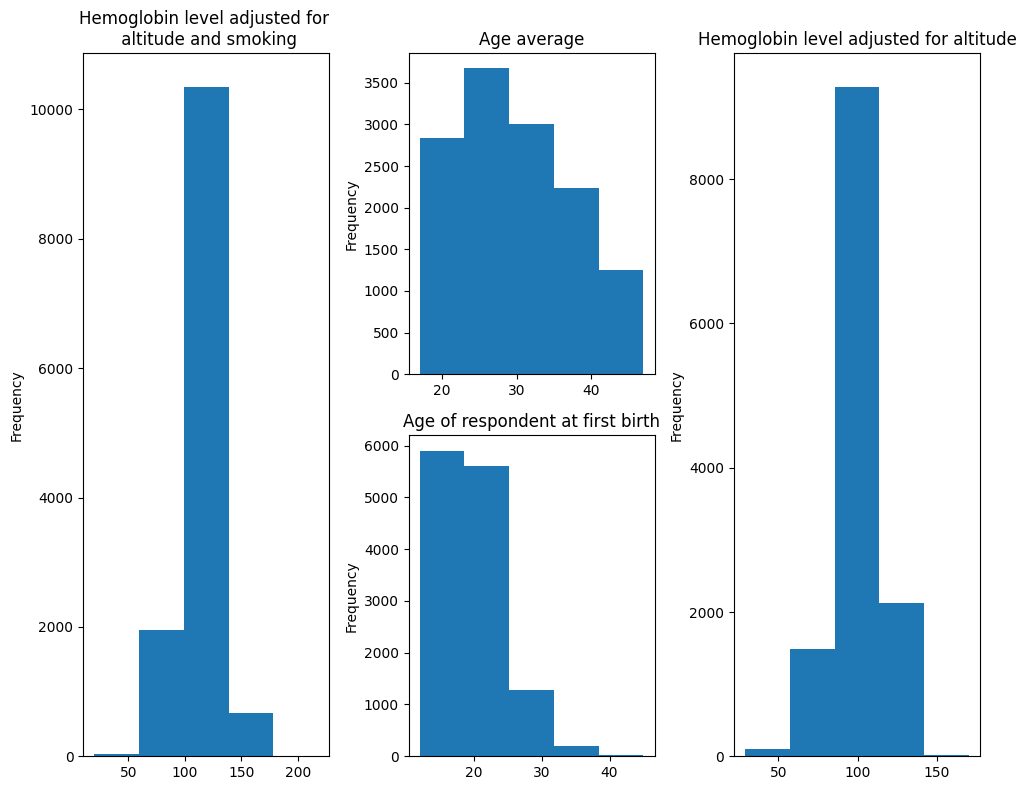

In [24]:
# selected histogram plots
fig,axes = plt.subplot_mosaic("""AABBCC
                                 AABBCC
                                 AADDCC
                                 AADDCC""",figsize=(10,8))
# axes = axes.flatten()

data_non['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].plot.hist(bins = 5,ax = axes['A'], title = f'Hemoglobin level adjusted for \n altitude and smoking')
data_non['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].plot.hist(bins = 5, ax = axes['C'], title = 'Hemoglobin level adjusted for altitude')
data_non['Age average'].plot.hist(bins=5, ax = axes['B'], title = 'Age average')
data_non['Age of respondent at 1st birth'].plot.hist(bins = 5, ax = axes['D'],title = "Age of respondent at first birth")
plt.tight_layout()

In [25]:
# check Anemia values proportion
data_non['Anemia level'].value_counts(normalize=True)
# Propotion of target is not balanced

Anemia level
Not anemic    0.406932
Moderate      0.301798
Mild          0.273978
Severe        0.017292
Name: proportion, dtype: float64

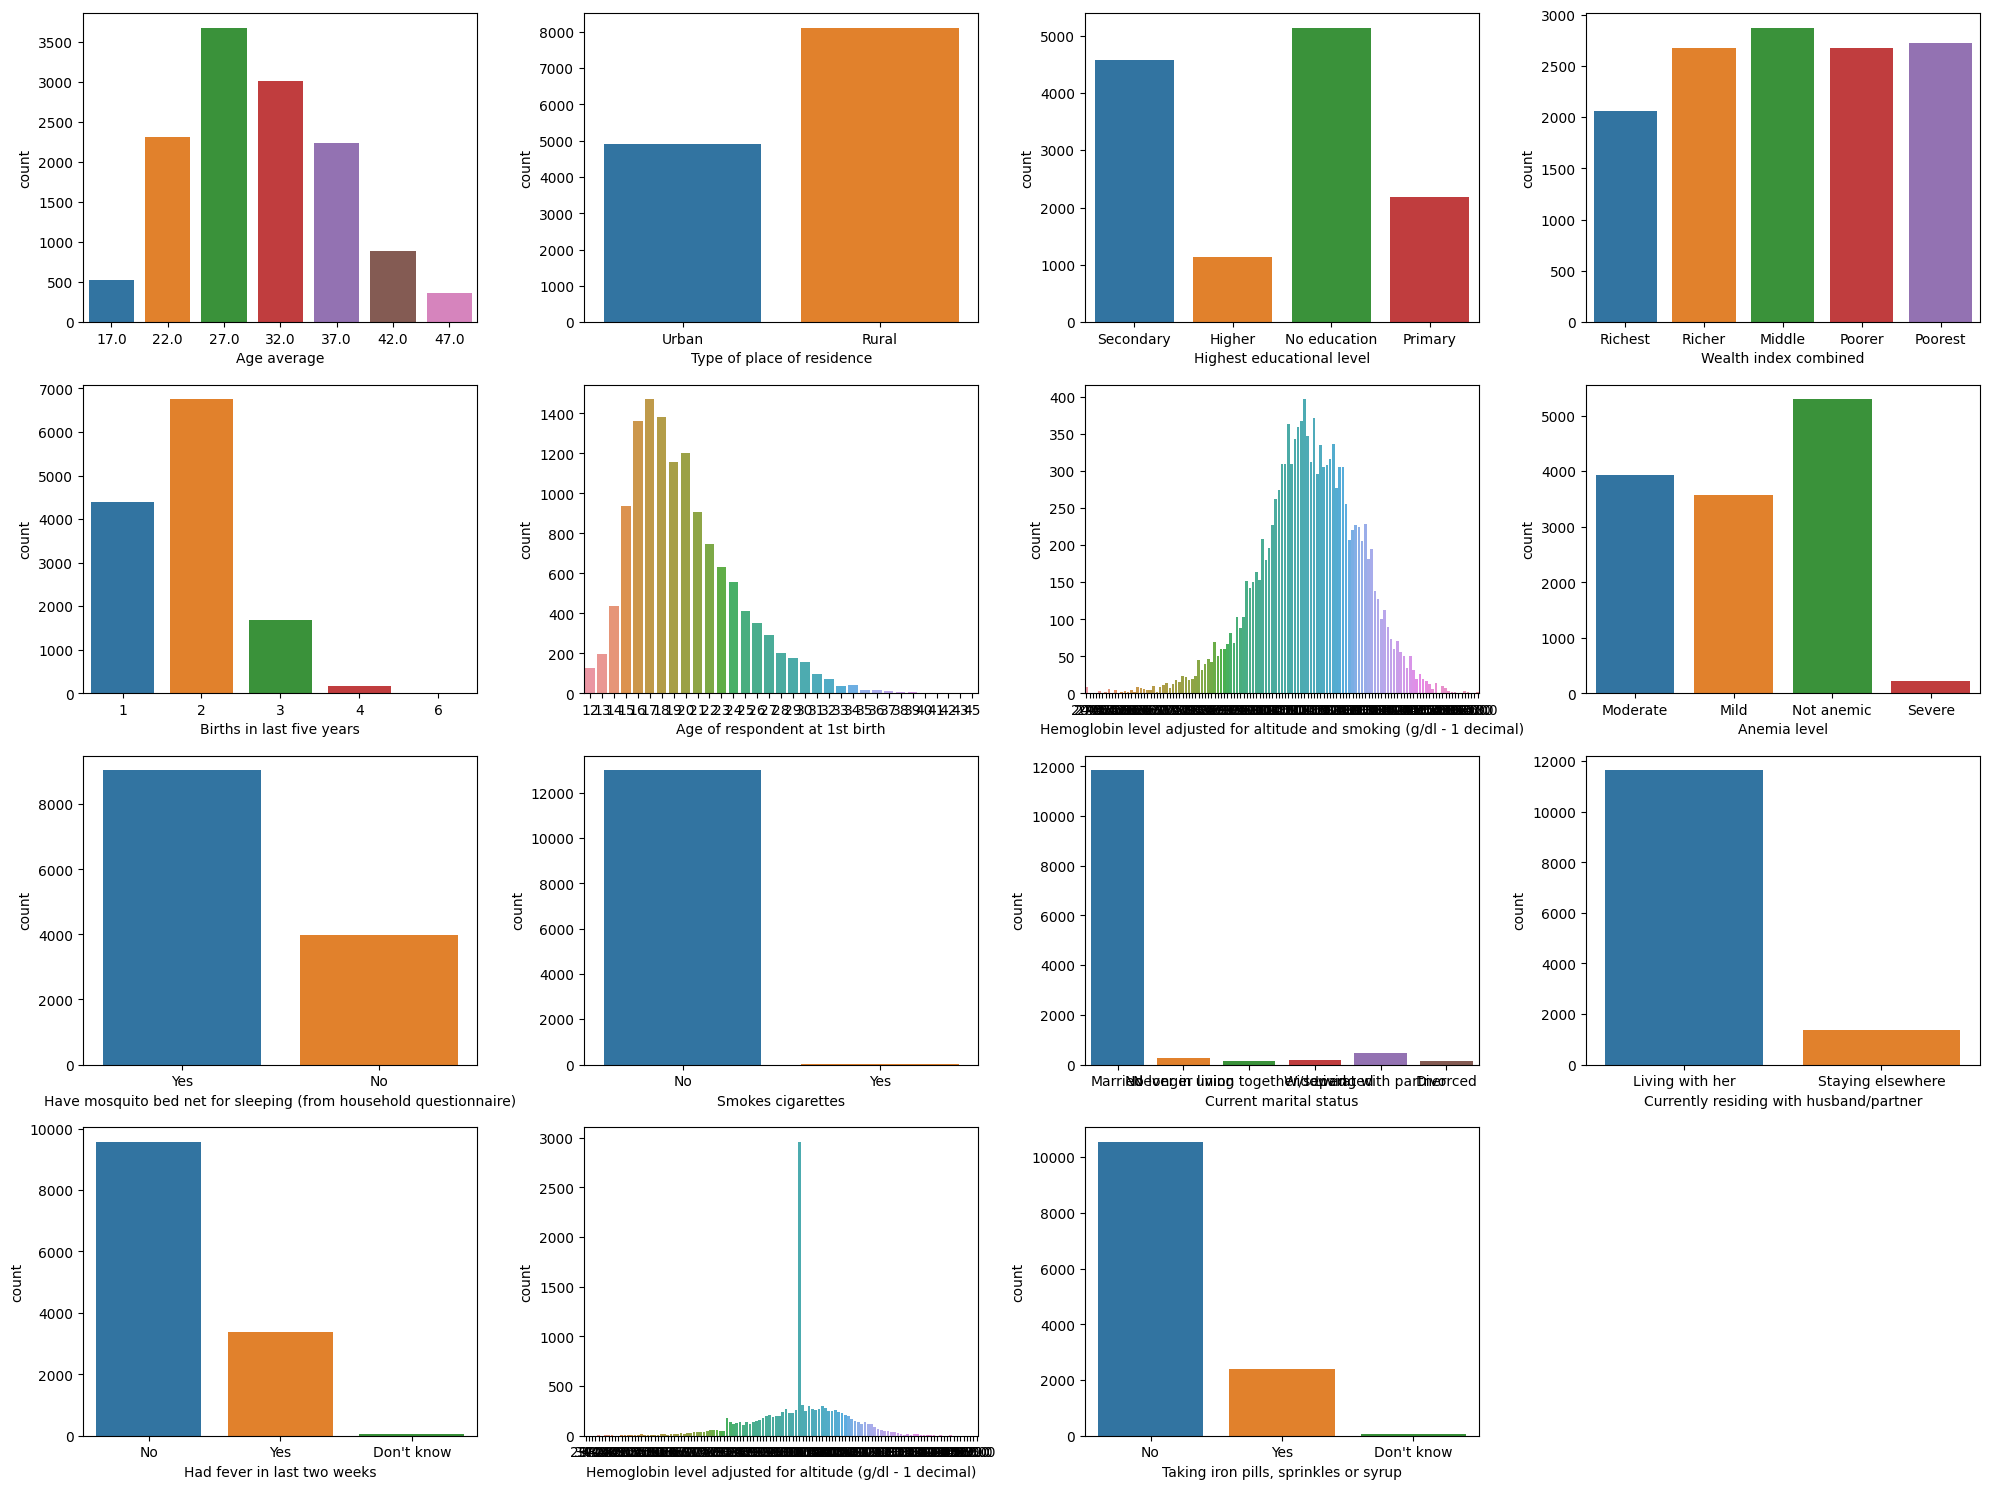

In [26]:
fig,axes = plt.subplots(4,4, figsize = (20,15))
axes = axes.flatten()
axes[-1].axis('off')
for col,ax in zip(data_non.columns,axes):
    sns.countplot(data_non, x = col, ax = ax)
    value_count = data_non[col].value_counts()
plt.tight_layout()

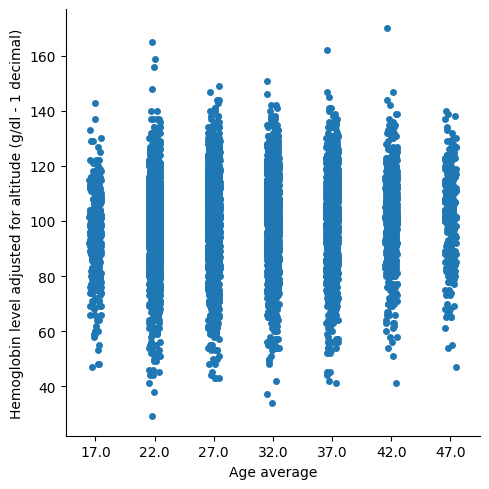

In [27]:
sns.catplot(data=data_non,x='Age average',y='Hemoglobin level adjusted for altitude (g/dl - 1 decimal)')

<Axes: xlabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', ylabel='Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'>

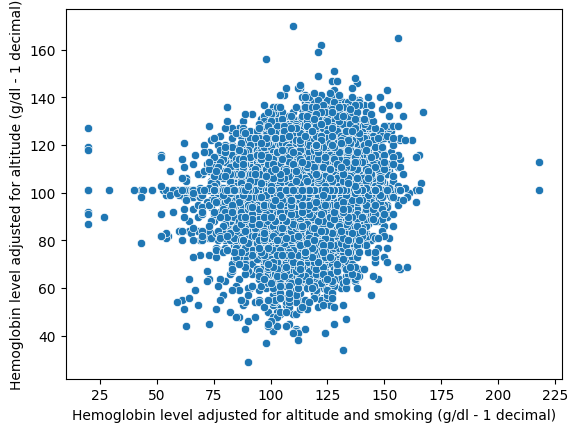

In [28]:
sns.scatterplot(data=data_non,x='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',y='Hemoglobin level adjusted for altitude (g/dl - 1 decimal)')

In [29]:
data_non.head()

,Age average,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
0,27.0,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,No,114.0,No
1,32.0,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,No,119.0,No
2,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,No,102.0,Yes
3,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,No,101.3,Yes
4,22.0,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,No,113.0,Yes


In [30]:
num_cols = ['Births in last five years','Hemoglobin level adjusted for altitude (g/dl - 1 decimal)','Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)','Age of respondent at 1st birth']
cat_cols = [col for col in data_non.columns if col not in num_cols and col != 'Anemia level']
cat_cols

['Age average',
 'Type of place of residence',
 'Highest educational level',
 'Wealth index combined',
 'Have mosquito bed net for sleeping (from household questionnaire)',
 'Smokes cigarettes',
 'Current marital status',
 'Currently residing with husband/partner',
 'Had fever in last two weeks',
 'Taking iron pills, sprinkles or syrup']

## MODEL I

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
le = LabelEncoder()
ss = StandardScaler()

In [33]:
data_non.isna().sum()

Age average                                                              0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

In [34]:
# variables for data modelling
X = data_non.drop('Anemia level', axis = 1)
y = le.fit_transform(data_non['Anemia level'])

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state = 12, stratify=y)

In [36]:
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
num_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer([('categories',cat_transformer, cat_cols),('numerical',num_transformer,num_cols)])

In [37]:
models = {'rf':RandomForestClassifier(),'log_regression':LogisticRegression(),'knn':KNeighborsClassifier()}

In [38]:
model_res = {}
for name,model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor),(name,model)])    
    model_res[name] = pipe.fit(X_train,y_train)


In [39]:
for name,model in model_res.items():
    print(f'{name:20s}: {model.score(X_test,y_test)}')

rf                  : 0.9323857087975413
log_regression      : 0.8828275067230119
knn                 : 0.7368421052631579


In [40]:
y_pred = model_res['rf'].predict(X_test)

In [41]:
cm = confusion_matrix(y_test,y_pred)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'estimator__max_depth': [10, 20, 30],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'estimator__bootstrap': [True, False]  # Method for sampling data points
}
grid_pipe = Pipeline([('preprocessor',preprocessor),('estimator',RandomForestClassifier())])
rf_grid = GridSearchCV(grid_pipe, param_grid=param_grid,n_jobs=-1,cv=5, error_score='raise')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categories',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Age '
                                                                          'average',
                                                                          'Type '
                                                                          'of '
                                                                          'place '
                                                                          'of '
                                                                          'residence',
                                                                          'Highest '
                                                                          'educational '
                                                                          'level',
                                                                          'Wealth '
                                                                          'index '
                                                                          'combined',
                                                                          'Have '
                                                                          'mosquito '
                                                                          'bed '
                                                                          'net '
                                                                          'for '
                                                                          'sleeping '
                                                                          '(f...
                                                                          'adjusted '
                                                                          'for '
                                                                          'altitude '
                                                                          'and '
                                                                          'smoking '
                                                                          '(g/dl '
                                                                          '- 1 '
                                                                          'decimal)',
                                                                          'Age '
                                                                          'of '
                                                                          'respondent '
                                                                          'at '
                                                                          '1st '
                                                                          'birth'])])),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator__bootstrap': [True, False],
                         'estimator__max_depth': [10, 20, 30],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [100, 200, 300]})

In [44]:
rf_grid.score(X_test,y_test)

0.9377641183250096

In [45]:
best_rf_grid = rf_grid.best_params_
best_rf_grid

{'estimator__bootstrap': False,
 'estimator__max_depth': 20,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__n_estimators': 300}

In [46]:
y_pred = rf_grid.predict(X_test)

In [47]:
cm = confusion_matrix(y_test,y_pred)

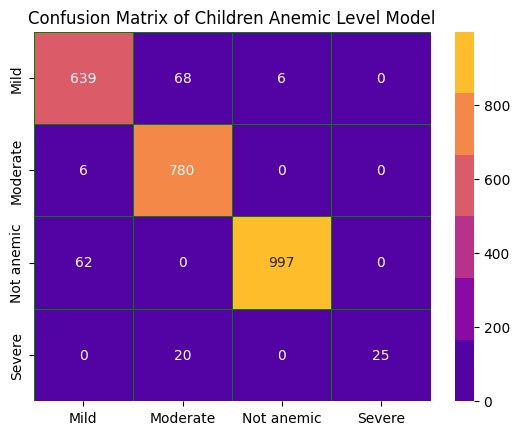

In [48]:
sns.heatmap(cm, annot = True,fmt = 'd',xticklabels= le.classes_, yticklabels= le.classes_, cmap=sns.color_palette("plasma"),linecolor='green',linewidths=.5)
plt.title('Confusion Matrix of Children Anemic Level Model')
plt.show()

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       713
           1       0.90      0.99      0.94       786
           2       0.99      0.94      0.97      1059
           3       1.00      0.56      0.71        45

    accuracy                           0.94      2603
   macro avg       0.95      0.85      0.88      2603
weighted avg       0.94      0.94      0.94      2603

